In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)


In [16]:
!pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


In [104]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image

In [120]:

inputBasePath = 'D:\\traffic_Data\\'
path = 'D:\\traffic_Data\\DATA'
testingFolder = 'D:\\traffic_Data\\TEST'
classes = pd.read_csv(os.path.join(inputBasePath,'labels.csv'))
classes_size = len(classes)
print("Total number of classes: ", classes_size)
classes




Total number of classes:  58


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


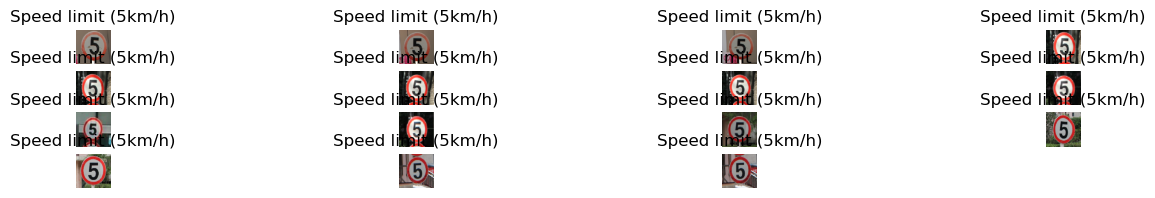

In [140]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Set the number of columns for subplots
num_columns = 4
num_images_to_display = 15

plt.figure(figsize=(16,16))
count = 0

for i in range(0, len(classes)):
    mypics = os.listdir("D:\\traffic_Data\\DATA\\" + str(i))

    # Set the number of rows for subplots
    num_rows = (len(mypics) + num_columns - 1) // num_columns

    for j, y in enumerate(mypics):
        if count >= num_images_to_display:
            break

        img_path = os.path.join(path, str(i), y)
        # Load and preprocess the image
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]

        # Plot the image in a subplot
        subplot_index = i * num_columns + j + 1
        if subplot_index <= num_rows * num_columns:
            plt.subplot(num_rows, num_columns, subplot_index)
            plt.imshow(img_array)
            plt.title(str(classes.loc[i, 'Name']))
            plt.axis('off')
            count += 1

plt.show()


In [141]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam



# Data preprocessing function
def preprocess_data(img_path, label):
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # If using RGB images
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img, label


plt.show()
# Read and preprocess the dataset
data = []
labels = []


for index, row in classes.iterrows():
    mypics=os.listdir("D:\\traffic_Data\\DATA\\" +str(row['ClassId']))
    for y in mypics:
        img_path = os.path.join(path, str(row['ClassId']),y)
        #print("Image path:", img_path)
        label = row['ClassId']
        img, label = preprocess_data(img_path, label)
        data.append(img)
        labels.append(label)

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Perform one-hot encoding on the labels
train_labels = to_categorical(train_labels, num_classes=classes_size)
val_labels = to_categorical(val_labels, num_classes=classes_size)



In [142]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to [0, 1]
)
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)


In [143]:
from keras.layers import Dropout

In [144]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes_size, activation='softmax'))
#Compilation of the model

In [145]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 15

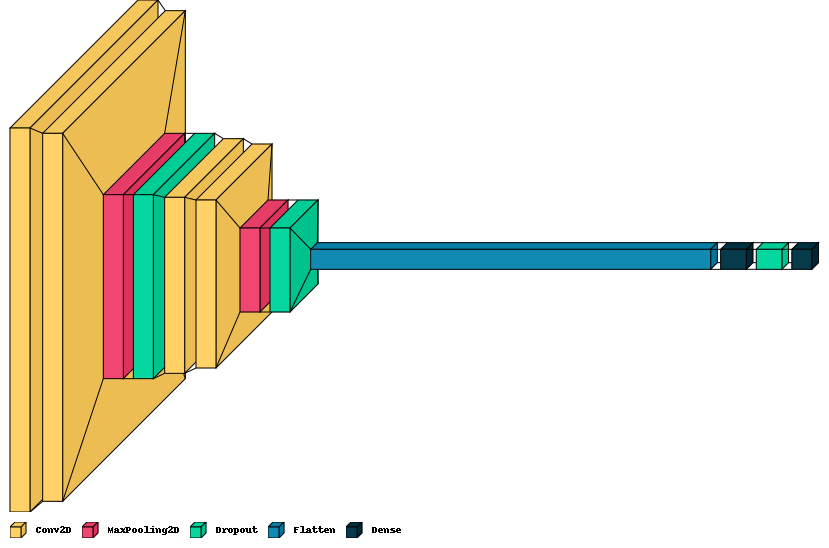

In [177]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [176]:
!pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/04/0b/52a3be50d3421977d779a159f6be484e7aa2c5304f6278ede5ed7c491ef5/aggdraw-1.3.18-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/44.9 kB ? eta -:--:--
   ---------------------------------------- 44.9/44.9 kB 2.2 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/04/0b/52a3be50d3421977d779a159f6be484e7aa2c5304f6278ede5ed7c491ef5/aggdraw-1.3.18-cp311-cp311-win_amd64.whl.metadata
  Using cached aggdraw-1.3.18-cp311-cp311-win_amd64.whl.metadata (673 bytes)
Using cached aggdraw-1.3.18-cp311-cp311-win_amd64.whl (44 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Harshini\\AppData\\Roaming\\Python\\Python311\\site-packages\\visualkeras\\utils.py'
Check the permissions.



In [146]:
from tensorflow.keras.callbacks import EarlyStopping


# Train the model with the EarlyStopping callback
history = model.fit(train_data, train_labels, epochs=eps, validation_data=(val_data, val_labels))


Epoch 1/15
105/105 [==============================] - 33s 306ms/step - loss: 2.7995 - accuracy: 0.3183 - val_loss: 1.6565 - val_accuracy: 0.5791
Epoch 2/15
105/105 [==============================] - 33s 316ms/step - loss: 1.3026 - accuracy: 0.6517 - val_loss: 0.6238 - val_accuracy: 0.8609
Epoch 3/15
105/105 [==============================] - 36s 345ms/step - loss: 0.6258 - accuracy: 0.8327 - val_loss: 0.2910 - val_accuracy: 0.9305
Epoch 4/15
105/105 [==============================] - 38s 359ms/step - loss: 0.3116 - accuracy: 0.9089 - val_loss: 0.1900 - val_accuracy: 0.9544
Epoch 5/15
105/105 [==============================] - 42s 401ms/step - loss: 0.2460 - accuracy: 0.9227 - val_loss: 0.1206 - val_accuracy: 0.9736
Epoch 6/15
105/105 [==============================] - 43s 414ms/step - loss: 0.1477 - accuracy: 0.9556 - val_loss: 0.0654 - val_accuracy: 0.9856
Epoch 7/15
105/105 [==============================] - 43s 412ms/step - loss: 0.1352 - accuracy: 0.9616 - val_loss: 0.1118 - val_ac

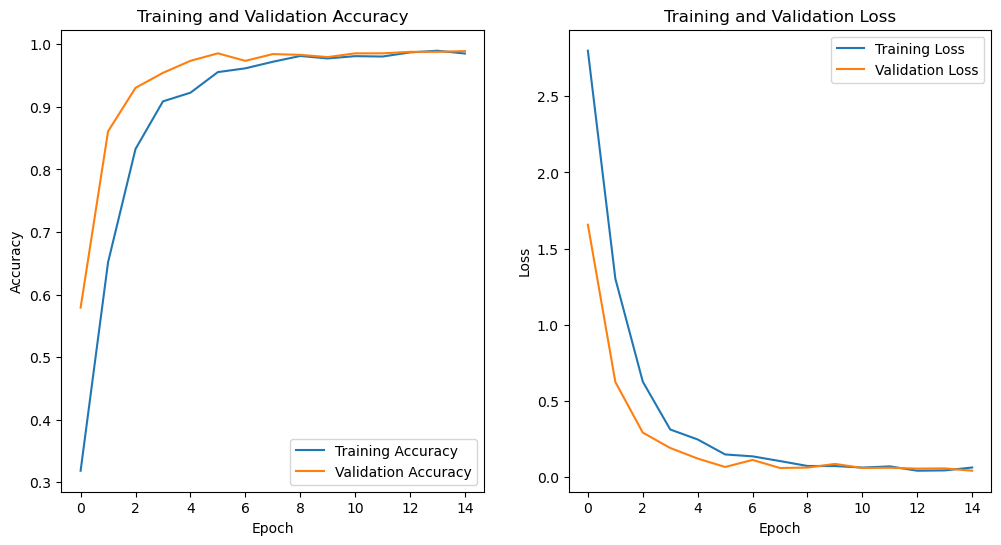

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [192]:
from sklearn.metrics import accuracy_score
inputBasePath = 'D:\\traffic_Data\\'
path = 'D:\\traffic_Data\\DATA'
testingFolder = 'D:\\traffic_Data\\TEST\\'
y_test = os.listdir(testingFolder)

data=[]


for img in y_test:
    img_path = os.path.join(testingFolder, img)
    image = Image.open(img_path)
    image = image.resize((100, 100))
    img_array = np.array(image)
    img_array_normalized = img_array / 255.
    data.append(img_array_normalized)

X_test=np.array(data)
print(X_test.shape)

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

class_mapping = dict(zip(classes['ClassId'], classes['Name']))

predicted_labels = [class_mapping[class_num] for class_num in predicted_classes]

print(predicted_labels)


print(predicted_classes)


(1994, 100, 100, 3)
63/63 [==============================] - 8s 128ms/step
['speed limit (80km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'speed limit (80km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (15km/h)', 'Speed limit (15km/h)', 'Speed limit (15km/h)', 'Speed limit (5km/h)', 'Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (15km/h)', 'Speed limit (15km/h)', 'Speed limit (15km/h)', 'Speed limit (5km/h)', 'Speed limit (30km/h)', 'Speed limit (30km/h)', 'Speed limit (30km/h)', 'Speed limit (5km/h)', 'Speed limit (30km/h)', 'Speed limit (30km/h)', 'Speed limit (30km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'speed limit (80km/h)', 'Unknown7', 'Speed limit (30km/h)', 'Dont Go straight', 'Dont Go straight', '